In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. READ DATA

In [64]:
monday = pd.read_csv('./data/monday.csv', sep=';')
tuesday = pd.read_csv('./data/tuesday.csv', sep=';')
wednesday = pd.read_csv('./data/wednesday.csv', sep=';')
thursday = pd.read_csv('./data/thursday.csv', sep=';')
friday = pd.read_csv('./data/friday.csv', sep=';')

In [65]:
days_data = [monday, tuesday, wednesday, thursday, friday]

# 2. MAKE customer ID-column Customer number + day

In [66]:
monday

,timestamp,customer_no,location
0,2019-09-02 07:03:00,1,dairy
1,2019-09-02 07:03:00,2,dairy
2,2019-09-02 07:04:00,3,dairy
3,2019-09-02 07:04:00,4,dairy
4,2019-09-02 07:04:00,5,spices
...,...,...,...
4879,2019-09-02 21:49:00,1442,checkout
4880,2019-09-02 21:49:00,1444,checkout
4881,2019-09-02 21:49:00,1445,dairy
4882,2019-09-02 21:50:00,1446,dairy


# 3. Make 'day'- column

In [67]:
monday['day'] = 'monday'
tuesday['day'] = 'tuesday'
wednesday['day'] = 'wednesday'
thursday['day'] = 'thursday'
friday['day'] = 'friday'
monday.head()

,timestamp,customer_no,location,day
0,2019-09-02 07:03:00,1,dairy,monday
1,2019-09-02 07:03:00,2,dairy,monday
2,2019-09-02 07:04:00,3,dairy,monday
3,2019-09-02 07:04:00,4,dairy,monday
4,2019-09-02 07:04:00,5,spices,monday


In [68]:
for day in days_data:
    day.timestamp = pd.to_datetime(day.timestamp)
    day.set_index('timestamp', inplace=True)

## 3.1. add new column 'day_id', (day and customer_no)

In [69]:
for day in days_data:
    list_of_IDs = []
    for unit in day['customer_no']:
        #print(unit)
        weekday = day['day'][0][:3]
        #print( unit, weekday)
        list_of_IDs.append(weekday +'-'+ str(unit))
    day['day_id'] = list_of_IDs   
tuesday

,customer_no,location,day,day_id
timestamp,,,,
2019-09-03 07:02:00,1,fruit,tuesday,tue-1
2019-09-03 07:02:00,2,drinks,tuesday,tue-2
2019-09-03 07:03:00,3,dairy,tuesday,tue-3
2019-09-03 07:05:00,1,drinks,tuesday,tue-1
2019-09-03 07:06:00,4,dairy,tuesday,tue-4
...,...,...,...,...
2019-09-03 21:47:00,1421,drinks,tuesday,tue-1421
2019-09-03 21:47:00,1422,dairy,tuesday,tue-1422
2019-09-03 21:48:00,1421,checkout,tuesday,tue-1421


# 4. add checkout for customers, that did not check out.

In [70]:
tuesday.iloc[1408]['day_id']

'tue-411'

In [71]:
def get_non_checkout(df):
    non_checkout_customers = df['customer_no'].max()
    checkout_customers = []
    for c_id in range(non_checkout_customers):
        if not 'checkout' in df[df['customer_no'] == c_id+1]['location'].values:
            checkout_customers.append(c_id+1)
    return checkout_customers


In [72]:
customers_to_checkout = []
for day in days_data:
    customers_to_checkout.append(get_non_checkout(day))

In [73]:
print(customers_to_checkout)

[[1430, 1433, 1437, 1439, 1440, 1441, 1443, 1445, 1446, 1447], [1411, 1422], [1520, 1527, 1528, 1529, 1530], [1527, 1532, 1533], [1494, 1496, 1500, 1503, 1505, 1506, 1509, 1510]]


In [74]:
pd.DataFrame(data = [[4,3,2], [11,12,13]],
             index=[4,5],
             columns=)

SyntaxError: invalid syntax (2497785355.py, line 3)

In [ ]:
def add_checkout(df, customer_nos, date, day):
    df_fill = pd.DataFrame()
    for p_id in customer_nos:
        #print(p_id)
        trial_id = df.iloc[p_id]['day_id']
        trial_day = df['day'][0][:3]
        #print(p_id, trial_id, trial_day)
        trial_together = trial_day + '-' + str(p_id)
        #print(trial_together)
        df_tmp = pd.DataFrame(data=[[p_id, 'checkout', day, trial_together]], # der letzte part ergibt noch die falschen day_id´s
                              index=[pd.to_datetime(f'2019-09-{date} 21:59:00')],
                              columns=['customer_no', 'location', 'day', 'day_id'])
        df = pd.concat([df, df_tmp])
    return df

In [ ]:
filled_data = []
weekdays = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday']
date = ['02', '03', '04', '05', '06']
for i, day in enumerate(days_data):
    #print(i)
    #print(day)
    temporary = add_checkout(day, customers_to_checkout[i], date[i], weekdays[i])
    filled_data.append(temporary)

# Here is something wrong, the filled _data has NaN-values

In [75]:
filled_data[1]

,customer_no,location,day,day_id
2019-09-03 07:02:00,1,fruit,tuesday,tue-1
2019-09-03 07:02:00,2,drinks,tuesday,tue-2
2019-09-03 07:03:00,3,dairy,tuesday,tue-3
2019-09-03 07:05:00,1,drinks,tuesday,tue-1
2019-09-03 07:06:00,4,dairy,tuesday,tue-4
...,...,...,...,...
2019-09-03 21:48:00,1421,checkout,tuesday,tue-1421
2019-09-03 21:49:00,1412,checkout,tuesday,tue-1412
2019-09-03 21:50:00,1411,dairy,tuesday,tue-1411
2019-09-03 21:59:00,1411,checkout,tuesday,tue-413


In [19]:
friday.tail()

,customer_no,location,day,day_id
timestamp,,,,
2019-09-06 21:50:00,1500,dairy,friday,fri-1500
2019-09-06 21:50:00,1507,checkout,friday,fri-1507
2019-09-06 21:50:00,1508,checkout,friday,fri-1508
2019-09-06 21:50:00,1509,drinks,friday,fri-1509
2019-09-06 21:50:00,1510,spices,friday,fri-1510


## 4.1. build new dataframe with all days

In [20]:
total = pd.concat(filled_data)
total

,customer_no,location,day,day_id
2019-09-02 07:03:00,1,dairy,monday,mon-1
2019-09-02 07:03:00,2,dairy,monday,mon-2
2019-09-02 07:04:00,3,dairy,monday,mon-3
2019-09-02 07:04:00,4,dairy,monday,mon-4
2019-09-02 07:04:00,5,spices,monday,mon-5
...,...,...,...,...
2019-09-06 21:59:00,1503,checkout,friday,NaN
2019-09-06 21:59:00,1505,checkout,friday,NaN
2019-09-06 21:59:00,1506,checkout,friday,NaN
2019-09-06 21:59:00,1509,checkout,friday,NaN


In [21]:
total['day_id'].isna().sum()

28

# 5. total customers in each section

<Axes: xlabel='day'>

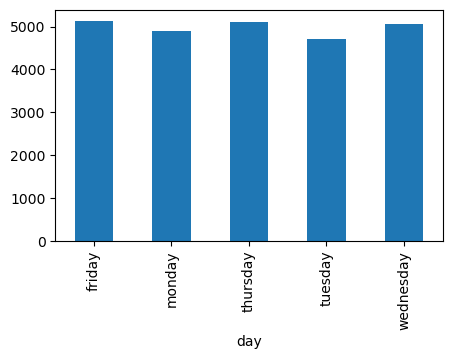

In [22]:
total.groupby('day')['customer_no'].count().plot(kind='bar', figsize=(5, 3))

<Axes: xlabel='location'>

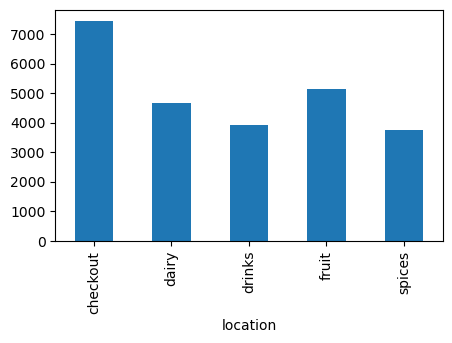

In [23]:
total.groupby('location')['customer_no'].count().plot(kind='bar',figsize=(5, 3))

# 6. Customers- section over time

In [24]:
answer = total.groupby(by=[total.index.day, total.index.hour, 'location'])['customer_no'].count()
answer = answer.unstack(2)

In [25]:
answer.index = answer.index.rename(['day','hour'])
answer

location  checkout  dairy  drinks  fruit  spices
day hour                                        
2   7           92     59      60     54      52
    8          112     68      65     68      51
    9           85     50      57     76      40
    10          90     58      35     47      52
    11          55     36      24     41      33
...            ...    ...     ...    ...     ...
6   17         115     73      76     87      65
    18         148    105      93    104      98
    19         135     84      76     93      65
    20         103     53      56     69      54
    21          60     39      34     36      20

[75 rows x 5 columns]

<Axes: xlabel='hour', ylabel='checkout'>

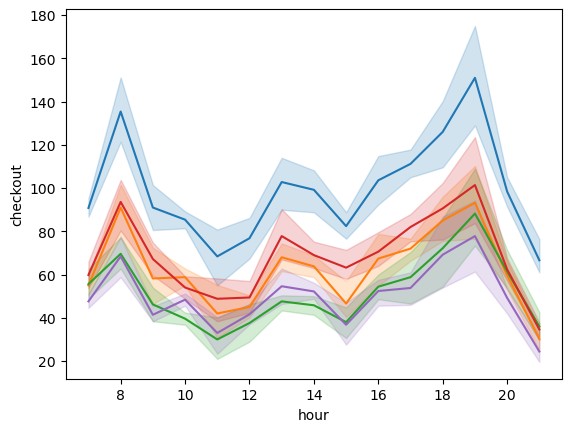

In [26]:
plot_data = answer.reset_index([0,1])

sns.lineplot(data=plot_data, x=plot_data.hour, y='checkout')
sns.lineplot(data=plot_data, x=plot_data.hour, y='dairy')
sns.lineplot(data=plot_data, x=plot_data.hour, y='drinks')
sns.lineplot(data=plot_data, x=plot_data.hour, y='fruit')
sns.lineplot(data=plot_data, x=plot_data.hour, y='spices')

# 7. time inside for every costumer.

In [27]:
perminute = total.groupby(['customer_no', 'day']).resample('1Min').ffill()
perminute.head(30)

customer_no  location        day  \
customer_no day                                                               
1           friday    2019-09-06 07:00:00            1     dairy     friday   
                      2019-09-06 07:01:00            1     dairy     friday   
                      2019-09-06 07:02:00            1     dairy     friday   
                      2019-09-06 07:03:00            1     dairy     friday   
                      2019-09-06 07:04:00            1    spices     friday   
                      2019-09-06 07:05:00            1  checkout     friday   
            monday    2019-09-02 07:03:00            1     dairy     monday   
                      2019-09-02 07:04:00            1     dairy     monday   
                      2019-09-02 07:05:00            1  checkout     monday   
            thursday  2019-09-05 07:00:00            1    drinks   thursday   
                      2019-09-05 07:01:00            1    drinks   thursday   
                      2019-09-05 07:02:00            1  checkout   thursday   
            tuesday   2019-09-03 07:02:00            1     fruit    tuesday   
                      2019-09-03 07:03:00            1     fruit    tuesday   
                      2019-09-03 07:04:00            1     fruit    tuesday   
                      2019-09-03 07:05:00            1    drinks    tuesday   
                      2019-09-03 07:06:00            1    drinks    tuesday   
                      2019-09-03 07:07:00            1    drinks    tuesday   
                      2019-09-03 07:08:00            1    drinks    tuesday   
                      2019-09-03 07:09:00            1    drinks    tuesday   
                      2019-09-03 07:10:00            1    drinks    tuesday   
                      2019-09-03 07:11:00            1    drinks    tuesday   
                      2019-09-03 07:12:00            1  checkout    tuesday   
            wednesday 2019-09-04 07:00:00            1     fruit  wednesday   
                      2019-09-04 07:01:00            1     fruit  wednesday   
                      2019-09-04 07:02:00            1  checkout  wednesday   
2           friday    2019-09-06 07:00:00            2    drinks     friday   
                      2019-09-06 07:01:00            2  checkout     friday   
            monday    2019-09-02 07:03:00            2     dairy     monday   
                      2019-09-02 07:04:00            2     dairy     monday   

                                          day_id  
customer_no day                                   
1           friday    2019-09-06 07:00:00  fri-1  
                      2019-09-06 07:01:00  fri-1  
                      2019-09-06 07:02:00  fri-1  
                      2019-09-06 07:03:00  fri-1  
                      2019-09-06 07:04:00  fri-1  
                      2019-09-06 07:05:00  fri-1  
            monday    2019-09-02 07:03:00  mon-1  
                      2019-09-02 07:04:00  mon-1  
                      2019-09-02 07:05:00  mon-1  
            thursday  2019-09-05 07:00:00  thu-1  
                      2019-09-05 07:01:00  thu-1  
                      2019-09-05 07:02:00  thu-1  
            tuesday   2019-09-03 07:02:00  tue-1  
                      2019-09-03 07:03:00  tue-1  
                      2019-09-03 07:04:00  tue-1  
                      2019-09-03 07:05:00  tue-1  
                      2019-09-03 07:06:00  tue-1  
                      2019-09-03 07:07:00  tue-1  
                      2019-09-03 07:08:00  tue-1  
                      2019-09-03 07:09:00  tue-1  
                      2019-09-03 07:10:00  tue-1  
                      2019-09-03 07:11:00  tue-1  
                      2019-09-03 07:12:00  tue-1  
            wednesday 2019-09-04 07:00:00  wed-1  
                      2019-09-04 07:01:00  wed-1  
                      2019-09-04 07:02:00  wed-1  
2           friday    2019-09-06 07:00:00  fri-2  
                      2019-09-06 07

<Axes: xlabel='customer_no', ylabel='day'>

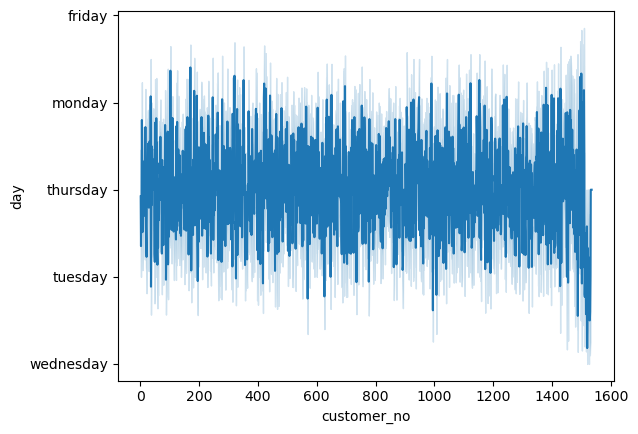

In [28]:
sns.lineplot(data=perminute, x=perminute.customer_no, y=perminute.day)
#sns.lineplot(data=plot_data, x=plot_data.hour, y='dairy')
#sns.lineplot(data=plot_data.day, x=plot_data.hour, y='drinks')
#sns.lineplot(data=plot_data.day, x=plot_data.hour, y='fruit')
#sns.lineplot(data=plot_data.day, x=plot_data.hour, y='spices')

# 8. total number of customers from 7.00 to 21.50 (avg of month)

# 9. distribution of customers sequence from 1st to nth. 

# 10. every customer and the sequenze of locations

In [29]:
day_id_list = perminute.groupby(perminute['day_id'])['location']

In [30]:
frame = pd.DataFrame(day_id_list)
frame

,0,1
0,fri-1,customer_no day 1 ...
1,fri-10,customer_no day 10 ...
2,fri-100,customer_no day 100 ...
3,fri-1000,customer_no day 1000 ...
4,fri-1001,customer_no day 1001 ...
...,...,...
7440,wed-995,customer_no day 99...
7441,wed-996,customer_no day 99...
7442,wed-997,customer_no day 99...
7443,wed-998,customer_no day 99...
